### K-Means Clustering - Credit Card Dataset

Use the K-Means Clustering algorithm to explore patterns in the dataset. Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). Use visualization if needed to identify trends in this data.

Source: [Credit Card Clustering from Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [78]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
location = "CC GENERAL.csv"
CC_df = pd.read_csv(location)
CC_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [80]:
c_card = CC_df[['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
c_card.head()

,BALANCE,CREDIT_LIMIT,PAYMENTS
0,40.900749,1000.0,201.802084
1,3202.467416,7000.0,4103.032597
2,2495.148862,7500.0,622.066742
3,1666.670542,7500.0,0.000000
4,817.714335,1200.0,678.334763


In [81]:
c_card.count()

BALANCE         8950
CREDIT_LIMIT    8949
PAYMENTS        8950
dtype: int64

In [82]:
c_card = c_card[c_card['PAYMENTS'].notnull() & c_card['BALANCE'].notnull() & c_card['CREDIT_LIMIT'].notnull()]
c_card.count()

BALANCE         8949
CREDIT_LIMIT    8949
PAYMENTS        8949
dtype: int64

In [83]:
c_card.dtypes

BALANCE         float64
CREDIT_LIMIT    float64
PAYMENTS        float64
dtype: object

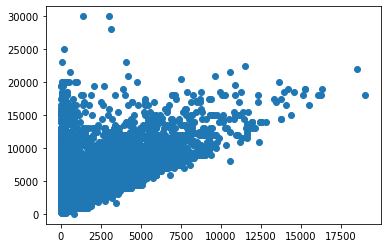

In [84]:
#ploting Balance and Credit limit data points to visually see where they are
plt.scatter(c_card['BALANCE'],c_card['CREDIT_LIMIT'])

In [85]:
#make a dataframe called X to hold the predictive features, payments
X = c_card.drop('PAYMENTS', axis=1)
X.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
3,1666.670542,7500.0
4,817.714335,1200.0


In [86]:
#initialize k-means function
#set number of clusters to categorize = 4
kmeans = KMeans(n_clusters=4)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
print(kmeans.cluster_centers_)

[[ 1955.65907324  6329.57099081]
 [  780.88558329  2134.78873969]
 [ 7465.44404359 11344.32809773]
 [ 1271.49609604 12453.0651341 ]]


Text(0, 0.5, 'Credit Limit')

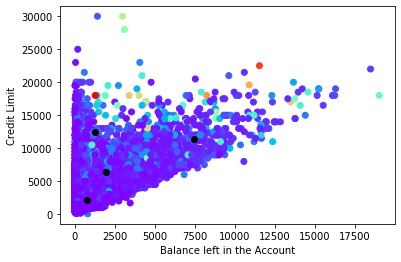

In [101]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(c_card['BALANCE'],c_card['CREDIT_LIMIT'], c=c_card['PAYMENTS'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
_
plt.xlabel('Balance left in the Account')
plt.ylabel('Credit Limit')

In [89]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
c_card['cluster'] = kmeans.labels_

#dataframe with new cluster column
c_card.head()


,BALANCE,CREDIT_LIMIT,PAYMENTS,cluster
0,40.900749,1000.0,201.802084,1
1,3202.467416,7000.0,4103.032597,0
2,2495.148862,7500.0,622.066742,0
3,1666.670542,7500.0,0.000000,0
4,817.714335,1200.0,678.334763,1


Text(0, 0.5, 'Credit Limit')

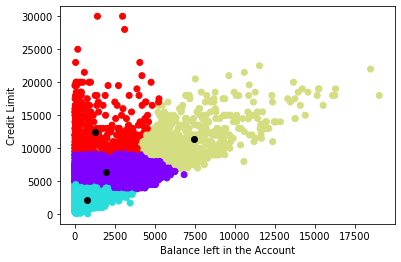

In [100]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(c_card['BALANCE'],c_card['CREDIT_LIMIT'], c=c_card['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('Balance left in the Account')
plt.ylabel('Credit Limit')

In [91]:
c_card2 = CC_df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']]
c_card2.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
0,40.900749,95.40,0.000000,201.802084,1000.0
1,3202.467416,0.00,6442.945483,4103.032597,7000.0
2,2495.148862,773.17,0.000000,622.066742,7500.0
3,1666.670542,1499.00,205.788017,0.000000,7500.0
4,817.714335,16.00,0.000000,678.334763,1200.0


In [92]:
c_card2.count()

BALANCE         8950
PURCHASES       8950
CASH_ADVANCE    8950
PAYMENTS        8950
CREDIT_LIMIT    8949
dtype: int64

In [96]:
c_card2 = c_card2[c_card2['BALANCE'].notnull() & c_card2['PURCHASES'].notnull() & c_card2['CASH_ADVANCE'].notnull() & c_card2['CREDIT_LIMIT'].notnull()]
c_card2.count()

BALANCE         8949
PURCHASES       8949
CASH_ADVANCE    8949
PAYMENTS        8949
CREDIT_LIMIT    8949
dtype: int64

Text(0, 0.5, 'Purchases')

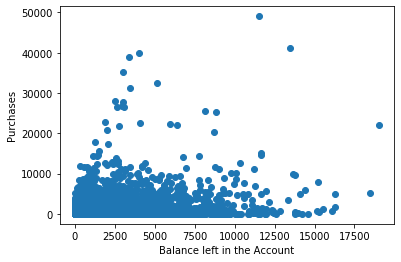

In [102]:
#ploting Balance and purchases data points to visually see where they are
plt.scatter(c_card2['BALANCE'],c_card2['PURCHASES'])

plt.xlabel('Balance left in the Account')
plt.ylabel('Purchases')

Text(0, 0.5, 'Payments')

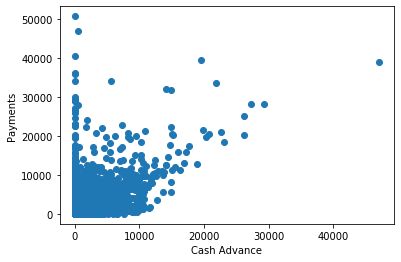

In [103]:
#ploting Cash Advance and payments data points to visually see where they are
plt.scatter(c_card2['CASH_ADVANCE'],c_card2['PAYMENTS'])

plt.xlabel('Cash Advance')
plt.ylabel('Payments')

In [104]:
#make a dataframe called X to hold the predictive features, CREDIT_LIMIT
X = c_card2.drop('CREDIT_LIMIT', axis=1)
X.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS
0,40.900749,95.40,0.000000,201.802084
1,3202.467416,0.00,6442.945483,4103.032597
2,2495.148862,773.17,0.000000,622.066742
3,1666.670542,1499.00,205.788017,0.000000
4,817.714335,16.00,0.000000,678.334763


In [105]:
#initialize k-means function
#set number of clusters to categorize = 3
kmeans = KMeans(n_clusters=3)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
print(kmeans.cluster_centers_)

[[ 4620.60513037  1596.84550227  3316.88878418  3758.52106612]
 [  866.79896426   720.41734587   402.21750469  1012.64283976]
 [ 4549.11166142 10308.54569106  5800.00099854 19001.24088315]]


Text(0, 0.5, 'Purchases')

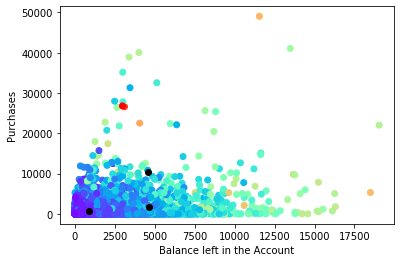

In [110]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category - credit card
plt.scatter(c_card2['BALANCE'],c_card2['PURCHASES'], c=c_card2['CREDIT_LIMIT'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
_
plt.xlabel('Balance left in the Account')
plt.ylabel('Purchases')

Text(0, 0.5, 'Payments')

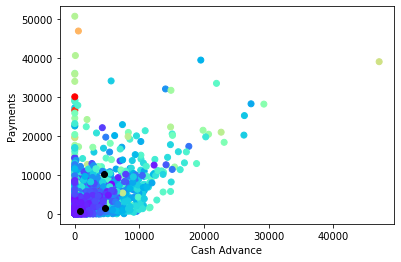

In [109]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category - credit card
plt.scatter(c_card2['CASH_ADVANCE'],c_card2['PAYMENTS'], c=c_card2['CREDIT_LIMIT'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
_
plt.xlabel('Cash Advance')
plt.ylabel('Payments')

In [115]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
c_card2['cluster'] = kmeans.labels_

#dataframe with new cluster column
c_card2.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,cluster
0,40.900749,95.40,0.000000,201.802084,1000.0,1
1,3202.467416,0.00,6442.945483,4103.032597,7000.0,0
2,2495.148862,773.17,0.000000,622.066742,7500.0,1
3,1666.670542,1499.00,205.788017,0.000000,7500.0,1
4,817.714335,16.00,0.000000,678.334763,1200.0,1


Text(0, 0.5, 'Purchases')

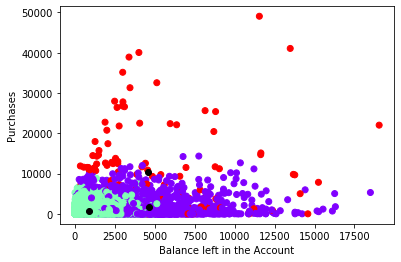

In [116]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(c_card2['BALANCE'],c_card2['PURCHASES'], c=c_card2['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('Balance left in the Account')
plt.ylabel('Purchases')

Text(0, 0.5, 'Payments')

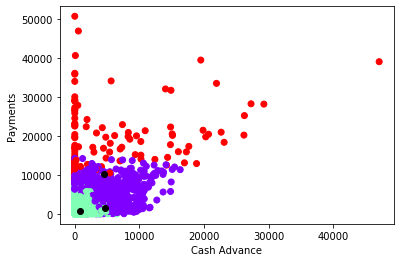

In [117]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(c_card2['CASH_ADVANCE'],c_card2['PAYMENTS'], c=c_card2['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('Cash Advance')
plt.ylabel('Payments')